In [43]:
import pandas as pd

In [44]:
fn = './data/WFIGS_Interagency_Fire_Perimeters.csv'
fires = pd.read_csv(fn)

C:\Users\13073\AppData\Local\Temp\ipykernel_37772\1380316171.py:2: DtypeWarning: Columns (46,76,82,83,84,85,87,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fires = pd.read_csv(fn)


In [45]:
fn1 = './data/ad_viz_plotval_data.csv'
epa = pd.read_csv(fn1)

In [46]:
epa = epa[['Date','Site ID','Daily Mean PM2.5 Concentration','UNITS','DAILY_AQI_VALUE','AQS_PARAMETER_DESC','STATE','COUNTY']]
epa.head()

,Date,Site ID,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,AQS_PARAMETER_DESC,STATE,COUNTY
0,01/01/2020,60010007,8.6,ug/m3 LC,36,PM2.5 - Local Conditions,California,Alameda
1,01/02/2020,60010007,4.5,ug/m3 LC,19,PM2.5 - Local Conditions,California,Alameda
2,01/03/2020,60010007,14.2,ug/m3 LC,55,PM2.5 - Local Conditions,California,Alameda
3,01/04/2020,60010007,10.9,ug/m3 LC,45,PM2.5 - Local Conditions,California,Alameda
4,01/05/2020,60010007,7.8,ug/m3 LC,33,PM2.5 - Local Conditions,California,Alameda


In [47]:
fires = fires[['attr_IncidentName','poly_Acres_AutoCalc','attr_FireCauseGeneral',
               'attr_FireDiscoveryDateTime','attr_FireOutDateTime','attr_InitialLatitude',
               'attr_InitialLongitude','attr_InitialResponseDateTime','attr_POOCounty',
               'attr_POOState','attr_PredominantFuelGroup']]
fires.head()

,attr_IncidentName,poly_Acres_AutoCalc,attr_FireCauseGeneral,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_InitialLatitude,attr_InitialLongitude,attr_InitialResponseDateTime,attr_POOCounty,attr_POOState,attr_PredominantFuelGroup
0,PULLEN CREEK,19.511718,NaN,2022/11/19 00:52:20+00,2022/12/28 21:59:59+00,46.36350,-122.5145,NaN,Cowlitz,US-WA,NaN
1,GULCH,113.417489,NaN,2022/08/29 18:26:00+00,2022/09/16 00:59:59+00,34.21669,-117.8589,NaN,Los Angeles,US-CA,NaN
2,BOLT CREEK,14820.485046,NaN,2022/09/10 14:35:00+00,NaN,47.75788,-121.3085,NaN,King,US-WA,NaN
3,Cedar Creek MF,127310.478765,NaN,2022/08/01 16:39:00+00,NaN,43.70266,-122.1398,NaN,Lane,US-OR,NaN
4,Musket,4.041311,NaN,2022/12/17 17:00:00+00,2022/12/17 19:34:59+00,33.67334,-111.5616,NaN,Maricopa,US-AZ,NaN


In [48]:
CA_fires=fires[fires.attr_POOState == 'US-CA'].drop_duplicates().sort_values(by='poly_Acres_AutoCalc', ascending=False)
CA_fires.to_csv('./data/CA_wildfires.csv', index=False)
CA_fires.head()

,attr_IncidentName,poly_Acres_AutoCalc,attr_FireCauseGeneral,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_InitialLatitude,attr_InitialLongitude,attr_InitialResponseDateTime,attr_POOCounty,attr_POOState,attr_PredominantFuelGroup
14400,DIXIE,963401.766520,NaN,2021/07/14 00:15:02+00,NaN,39.876000,-121.378833,NaN,Plumas,US-CA,NaN
14411,DOE,590558.481159,NaN,2020/08/16 15:48:00+00,2022/10/31 19:12:00+00,39.765360,-122.673400,2020/08/16 16:09:59+00,Glenn,US-CA,Grass-Shrub
13847,DONT USE 1,390647.255518,NaN,2020/08/16 23:37:28+00,NaN,37.109676,-121.638571,NaN,Santa Clara,US-CA,NaN
14425,CREEK,380561.120304,NaN,2020/09/05 01:33:00+00,2021/02/22 08:00:00+00,37.195740,-119.263800,2020/09/05 01:44:00+00,Fresno,US-CA,Timber
14412,HOPKINS,328991.162338,NaN,2020/08/18 01:01:49+00,2022/10/31 20:56:00+00,40.125510,-123.073100,2020/08/18 15:59:59+00,Trinity,US-CA,Brush


In [49]:
CA_fires['Date'] = CA_fires['attr_FireDiscoveryDateTime'].str.split(' ').str[0]
CA_fires['Time'] = CA_fires['attr_FireDiscoveryDateTime'].str.split(' ').str[1]

CA_fires['Date'] = pd.to_datetime(CA_fires['Date'], format='%Y/%m/%d')
CA_fires['Date'] = CA_fires['Date'].dt.strftime('%m/%d/%Y')
CA_fires.head()


,attr_IncidentName,poly_Acres_AutoCalc,attr_FireCauseGeneral,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_InitialLatitude,attr_InitialLongitude,attr_InitialResponseDateTime,attr_POOCounty,attr_POOState,attr_PredominantFuelGroup,Date,Time
14400,DIXIE,963401.766520,NaN,2021/07/14 00:15:02+00,NaN,39.876000,-121.378833,NaN,Plumas,US-CA,NaN,07/14/2021,00:15:02+00
14411,DOE,590558.481159,NaN,2020/08/16 15:48:00+00,2022/10/31 19:12:00+00,39.765360,-122.673400,2020/08/16 16:09:59+00,Glenn,US-CA,Grass-Shrub,08/16/2020,15:48:00+00
13847,DONT USE 1,390647.255518,NaN,2020/08/16 23:37:28+00,NaN,37.109676,-121.638571,NaN,Santa Clara,US-CA,NaN,08/16/2020,23:37:28+00
14425,CREEK,380561.120304,NaN,2020/09/05 01:33:00+00,2021/02/22 08:00:00+00,37.195740,-119.263800,2020/09/05 01:44:00+00,Fresno,US-CA,Timber,09/05/2020,01:33:00+00
14412,HOPKINS,328991.162338,NaN,2020/08/18 01:01:49+00,2022/10/31 20:56:00+00,40.125510,-123.073100,2020/08/18 15:59:59+00,Trinity,US-CA,Brush,08/18/2020,01:01:49+00


In [50]:
maxbycounty = pd.pivot_table(CA_fires, values='poly_Acres_AutoCalc', index=['attr_POOCounty'], aggfunc='max')
maxbycounty.head(25)

,poly_Acres_AutoCalc
attr_POOCounty,
Alameda,762.308145
Alpine,67054.241831
Amador,4467.077579
Butte,946.676433
Calaveras,1456.107941
Colusa,741.454736
Contra Costa,57.026104
El Dorado,221785.545839
Fresno,380561.120304


In [51]:
maxbyfuel = pd.pivot_table(CA_fires, values='poly_Acres_AutoCalc', index=['attr_PredominantFuelGroup'], aggfunc='max')
maxbyfuel

,poly_Acres_AutoCalc
attr_PredominantFuelGroup,
Brush,328991.162338
Grass,9150.367750
Grass-Shrub,590558.481159
Nonburnable,2.344878
Slash,93.223871
Timber,380561.120304


In [52]:
meanbyfuel = pd.pivot_table(CA_fires, values='poly_Acres_AutoCalc', index=['attr_PredominantFuelGroup'], aggfunc='mean')
meanbyfuel

,poly_Acres_AutoCalc
attr_PredominantFuelGroup,
Brush,5171.134201
Grass,185.090903
Grass-Shrub,3945.746720
Nonburnable,1.187263
Slash,14.232957
Timber,7756.564987


In [53]:
CA_fires.rename(columns={'attr_POOCounty': 'COUNTY'}, inplace=True)
joined_df = pd.merge(epa, CA_fires, on=['Date','COUNTY'])
joined_df.head()

,Date,Site ID,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,AQS_PARAMETER_DESC,STATE,COUNTY,attr_IncidentName,poly_Acres_AutoCalc,attr_FireCauseGeneral,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_InitialLatitude,attr_InitialLongitude,attr_InitialResponseDateTime,attr_POOState,attr_PredominantFuelGroup,Time
0,08/23/2020,60010007,99.9,ug/m3 LC,174,PM2.5 - Local Conditions,California,Alameda,WELCH,762.308145,NaN,2020/08/23 08:21:58+00,NaN,37.53322,-121.797272,NaN,US-CA,NaN,08:21:58+00
1,08/23/2020,60010009,33.4,ug/m3 LC,96,PM2.5 - Local Conditions,California,Alameda,WELCH,762.308145,NaN,2020/08/23 08:21:58+00,NaN,37.53322,-121.797272,NaN,US-CA,NaN,08:21:58+00
2,08/23/2020,60010011,21.9,ug/m3 LC,72,PM2.5 - Local Conditions,California,Alameda,WELCH,762.308145,NaN,2020/08/23 08:21:58+00,NaN,37.53322,-121.797272,NaN,US-CA,NaN,08:21:58+00
3,08/23/2020,60010012,28.0,ug/m3 LC,84,PM2.5 - Local Conditions,California,Alameda,WELCH,762.308145,NaN,2020/08/23 08:21:58+00,NaN,37.53322,-121.797272,NaN,US-CA,NaN,08:21:58+00
4,08/23/2020,60010013,21.4,ug/m3 LC,71,PM2.5 - Local Conditions,California,Alameda,WELCH,762.308145,NaN,2020/08/23 08:21:58+00,NaN,37.53322,-121.797272,NaN,US-CA,NaN,08:21:58+00


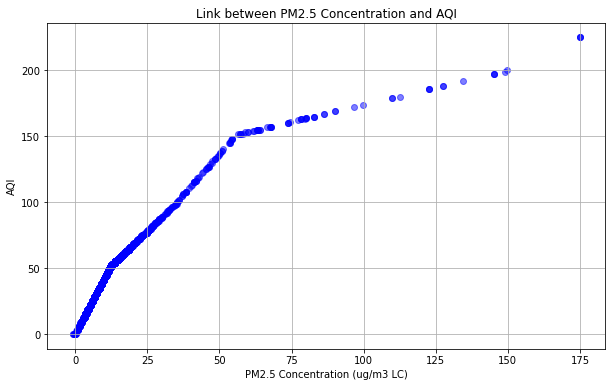

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(joined_df['Daily Mean PM2.5 Concentration'], joined_df['DAILY_AQI_VALUE'], color='blue', alpha=0.5)
ax.set_xlabel('PM2.5 Concentration (ug/m3 LC)')
ax.set_ylabel('AQI')
ax.set_title('Link between PM2.5 Concentration and AQI')

ax.grid(True)

plt.show();


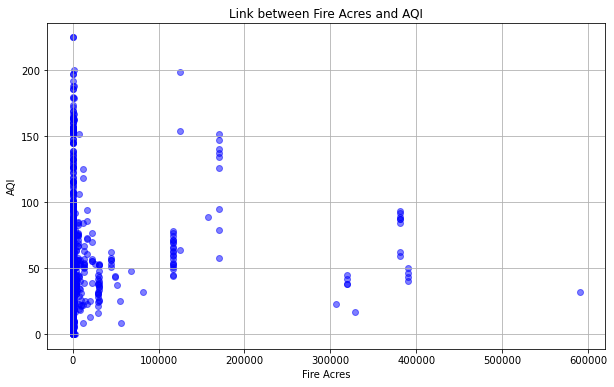

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(joined_df['poly_Acres_AutoCalc'], joined_df['DAILY_AQI_VALUE'], color='blue', alpha=0.5)
ax.set_xlabel('Fire Acres')
ax.set_ylabel('AQI')
ax.set_title('Link between Fire Acres and AQI')

# Add gridlines
ax.grid(True)

# Show the plot
plt.show()


In [65]:
num_cols = joined_df.columns[joined_df.dtypes != 'object'].dropna()
fires_num=joined_df[num_cols].dropna()

# drop y
num_cols = num_cols.drop('DAILY_AQI_VALUE')

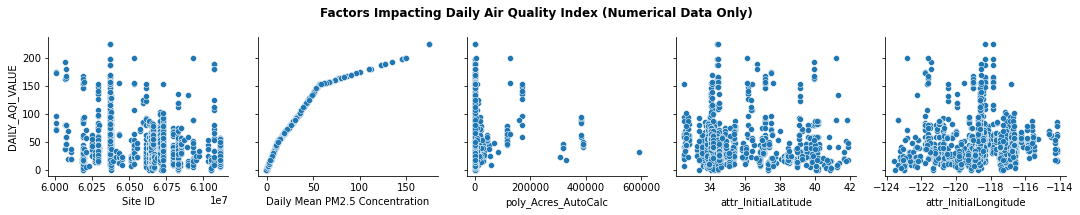

In [68]:
import seaborn as sns

x_vars=num_cols
y_var = "DAILY_AQI_VALUE"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=joined_df, x=x_var, y=y_var, ax=ax)
    g.set_titles(row_template='', col_template='')


g.fig.suptitle("Factors Impacting Daily Air Quality Index (Numerical Data Only)", fontsize='large', fontweight='bold')

g.tight_layout()
g.fig.savefig('img/Factors Impacting Daily Air Quality Index.png')